In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import logging
import os
from cabam.utils import dataset_summary

logging.basicConfig(level=logging.INFO)

os.makedirs('./figures/', exist_ok=True)

# Experiments on benchmark datasets

INFO:root:Loading dataset cora
/Users/nshah/opt/anaconda3/envs/cabam/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
INFO:root:Nodes: 19793
INFO:root:Edges: 146635.0
INFO:root:Features: 8710
INFO:root:Overall assortativity: 0.6700194678780013
INFO:root:Above mean degree prediction: 0.6232590718781238
INFO:root:Loading dataset cora_ml
/Users/nshah/opt/anaconda3/envs/cabam/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
INFO:root:Nodes: 2995
INFO:root:Edges: 19311.0
INFO:root:Features: 2879
INFO:root:Overall assortativity: 0.845333094234735
INFO:root:Above mean degree prediction: 0.5936855701769741
INFO:root:Loading dataset citeseer
/Users/nshah/opt/anaconda3/envs/cabam/lib/pyt

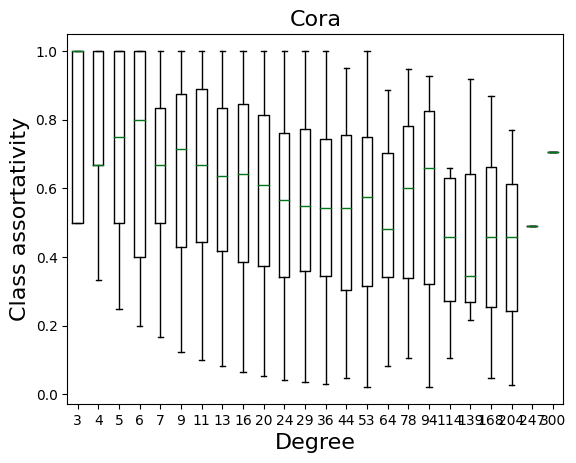

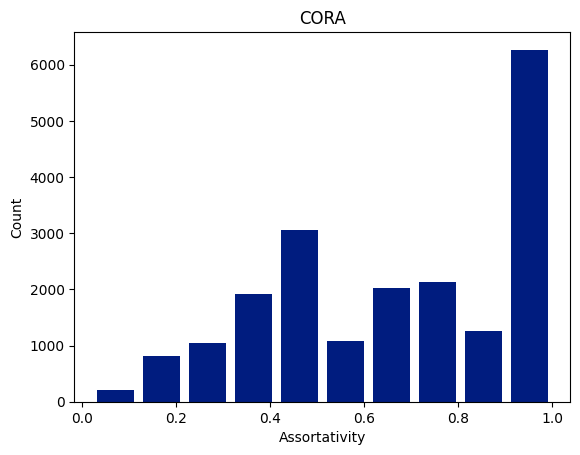

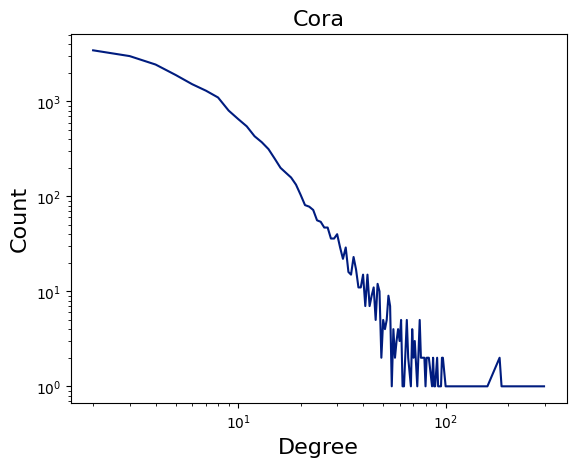

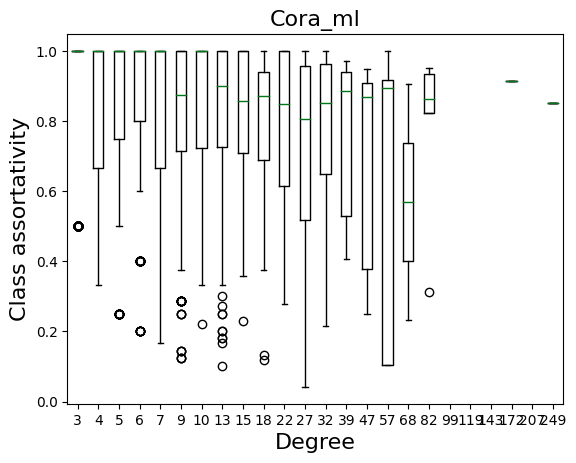

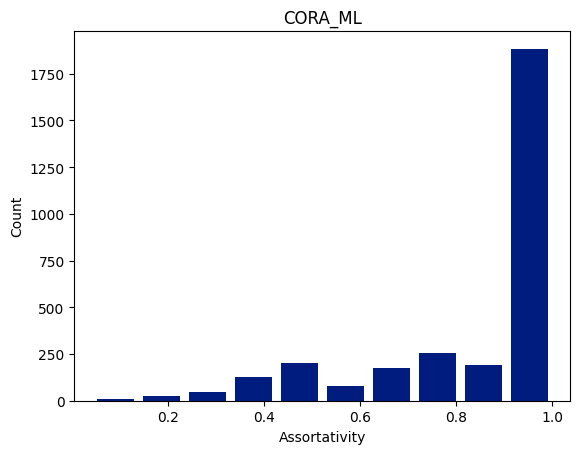

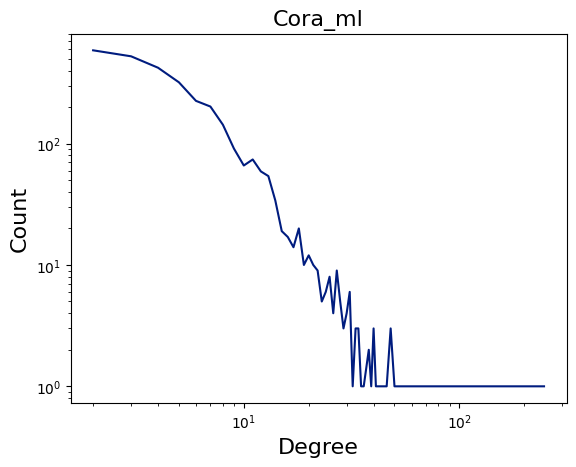

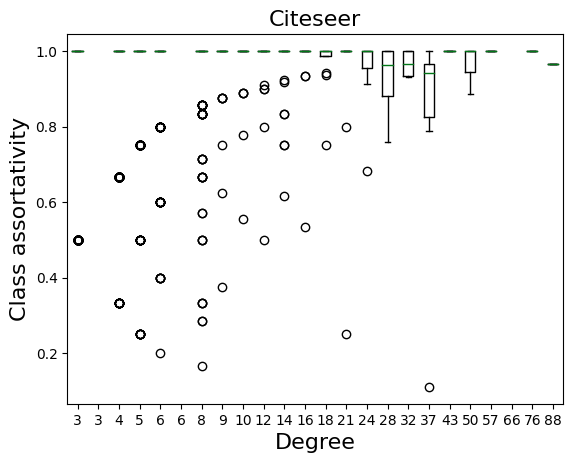

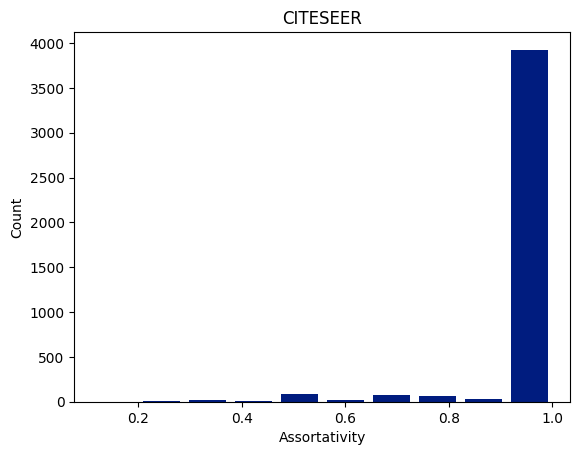

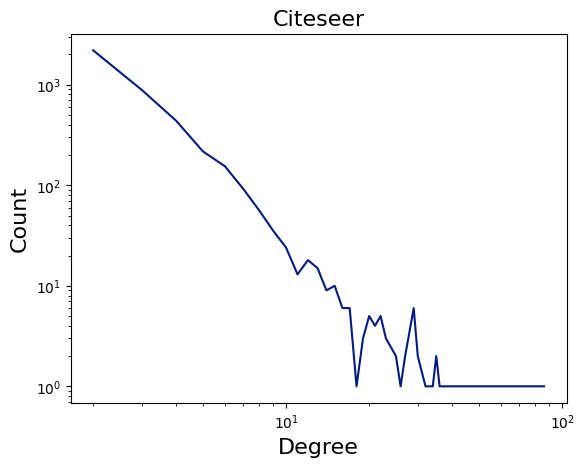

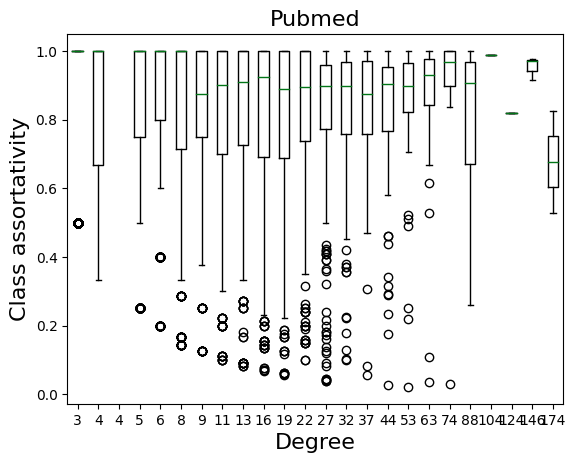

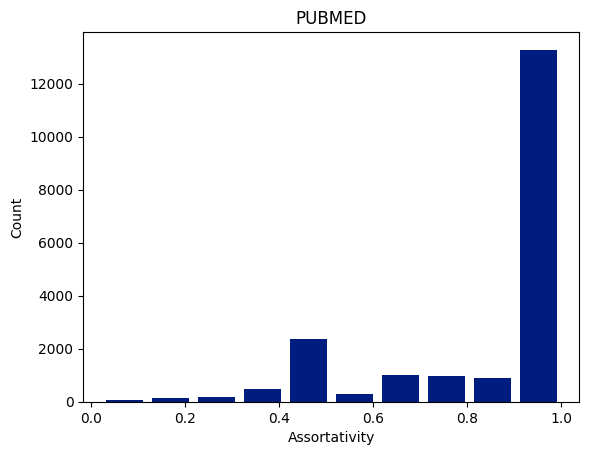

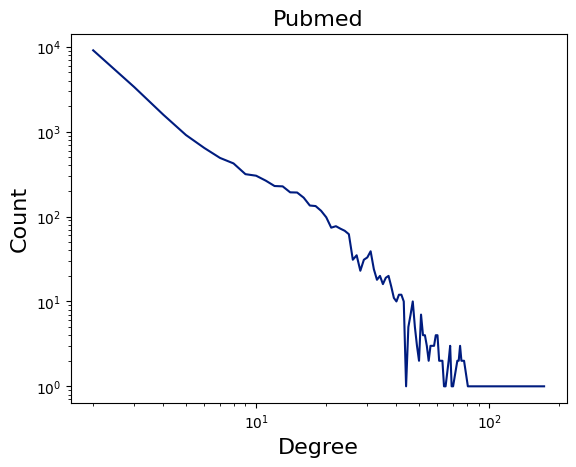

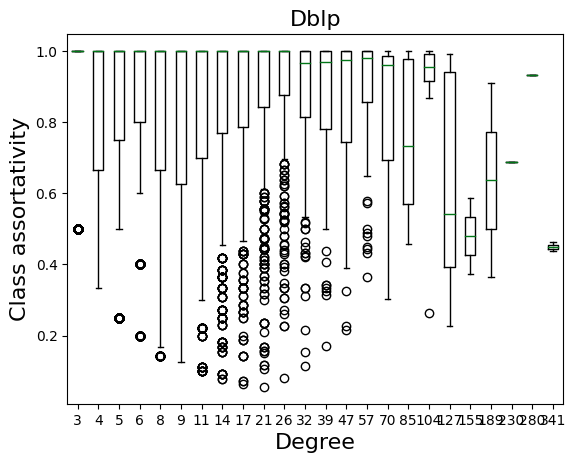

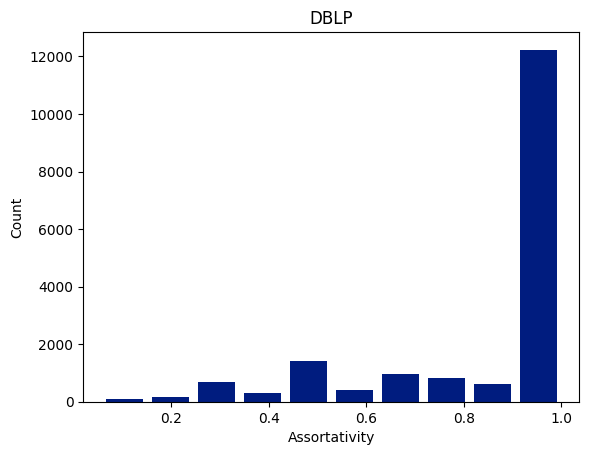

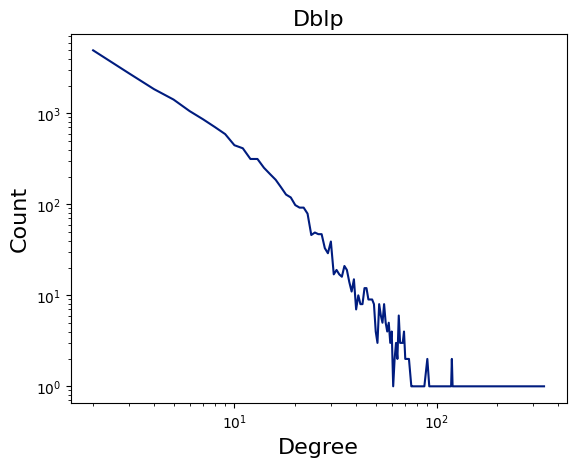

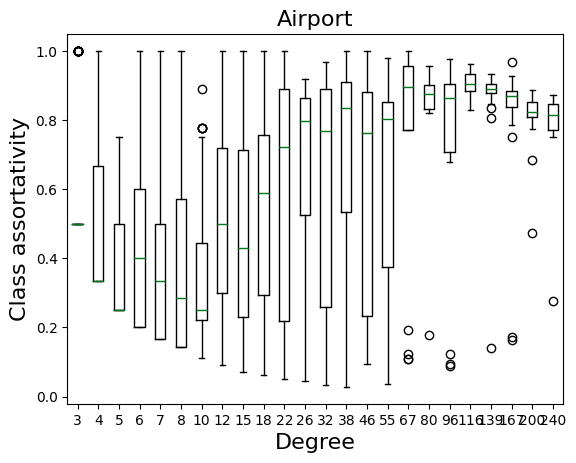

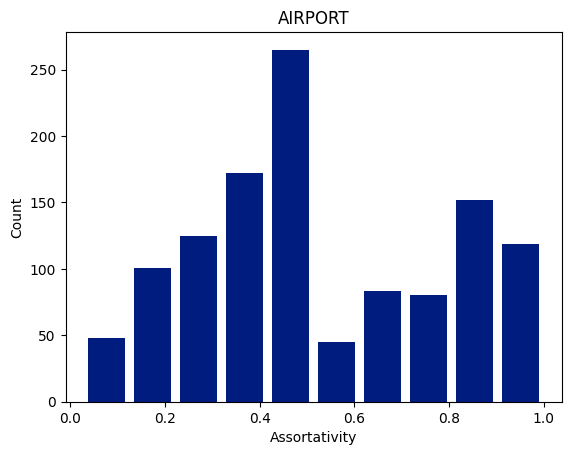

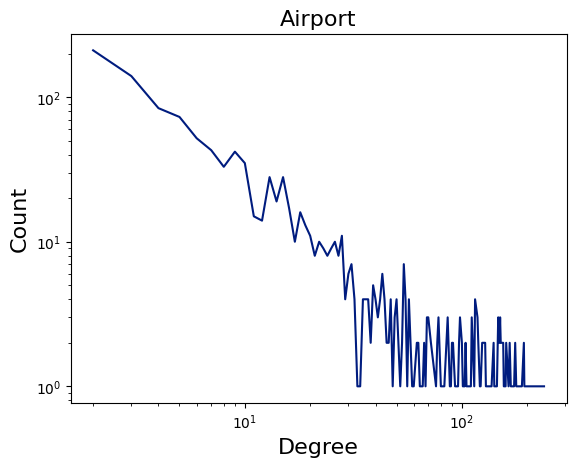

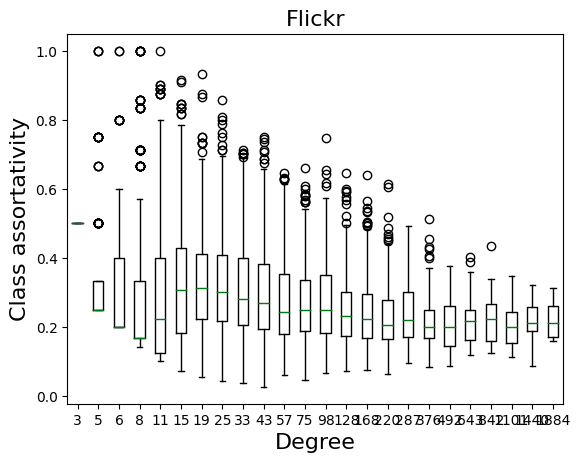

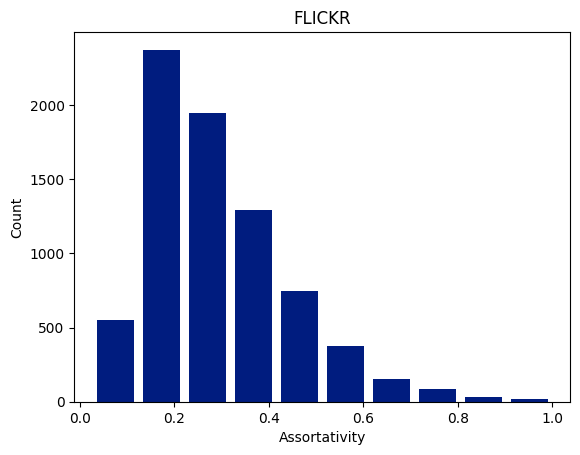

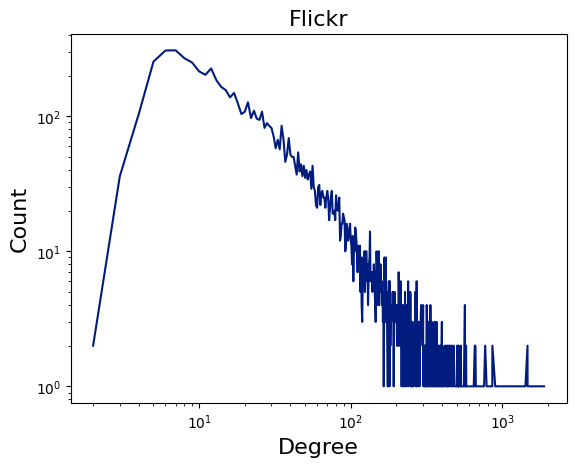

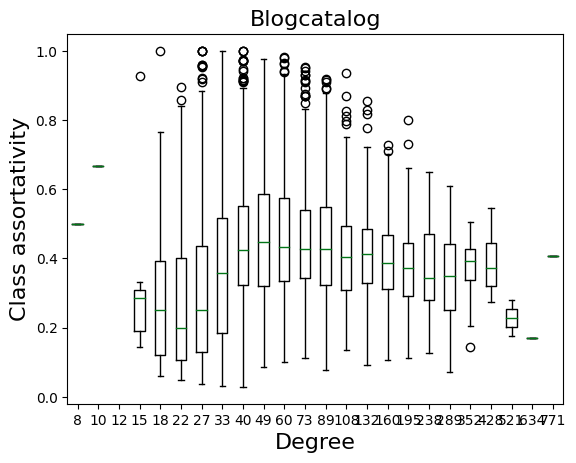

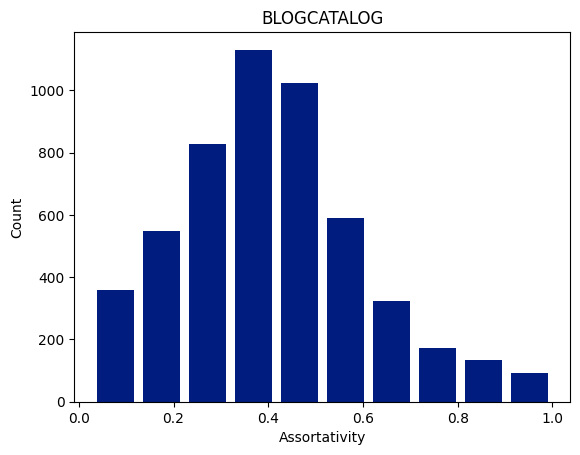

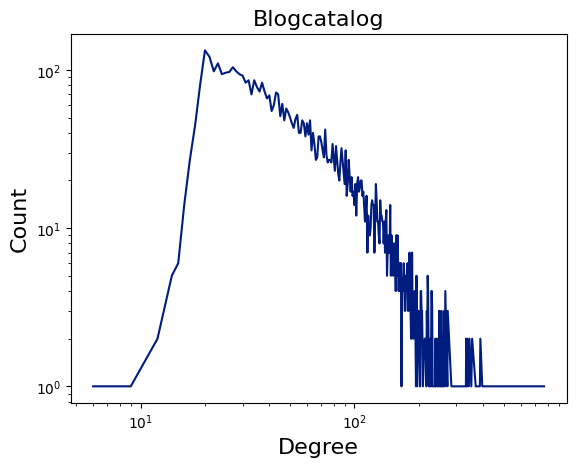

In [2]:
plt.style.use('seaborn-dark-palette')


for dataset in ['cora', 'cora_ml', 'citeseer', 'pubmed', 'dblp', 'airport', 'flickr', 'blogcatalog']:
    A, H, y, G = dataset_summary.produce_processed_data(dataset=dataset)
    
    # generate summary stats of dataset
    dataset_summary.log_dataset_summary(A, H)
    
    # generate boxplot of assortativity vs. degree
    degs, assortativities = dataset_summary.plot_degree_label_assortativity(G, y, dataset, bins=25)

    # generate overall assortativity statistic
    assortativity = dataset_summary.compute_overall_label_assortativity(G, y)

    # compute emb-degree prediction
    dataset_summary.emb_degree_prediction(A, H)

    # plot node-level assortativity
    dataset_summary.plot_node_level_assortativity(G, y, dataset)
    
    # plot degree distribution
    dataset_summary.plot_degree_distribution(A, dataset)

